<a href="https://colab.research.google.com/github/AidanRocke/AutoDiff/blob/master/Copy_of_streamlinedgood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.stats import ortho_group, special_ortho_group
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from numba import jit

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c8024e476cefa2e0cfb5cce3dddb941e75ed77f8af2b71db1cc687ed9fb7f78f
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=f38f188f43b18a5185d6116b8684ff363047a2c64071bebd33e32b221ace8431
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:

def rand_pt(n, num=1):
  if num==1:
    return special_ortho_grouo_rvs(n)
  l = [special_ortho_group.rvs(n)[:, 0] for _ in range(num)]
  return np.vstack(l)

In [ ]:
import umap

In [ ]:
def umap_compare(data,*, indim = 3, outdim = 2):
  reducer = umap.UMAP(n_components = outdim)
  #data = rand_pt(indim, n)
  reduced = reducer.fit_transform(data)
  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(30)
  if indim == 3:
    ax1 = f.add_subplot(211,projection='3d')
    xs = data[:, 0]
    ys = data[:, 1]
    zs = data[:, 2]
    ax1.scatter(xs, ys, zs)
    ax1.set_title("original data")
  else:
    ax1 = f.add_subplot(211)
    xs = data[:, 0]
    ys = data[:, 1]
    ax1.scatter(xs, ys)
    ax1.set_title("original data")
  if outdim == 3:
    ax2 = f.add_subplot(212, projection='3d')
    xs = reduced[:, 0]
    ys = reduced[:, 1]
    zs = reduced[:, 2]
    ax2.scatter(xs, ys, zs, s=1)
    ax2.set_title("reduced data")
  else:
    ax2 = f.add_subplot(212)
    xs = reduced[:, 0]
    ys = reduced[:, 1]
    ax2.scatter(xs, ys, s=1)
    ax2.set_title("reduced data")
  plt.show()





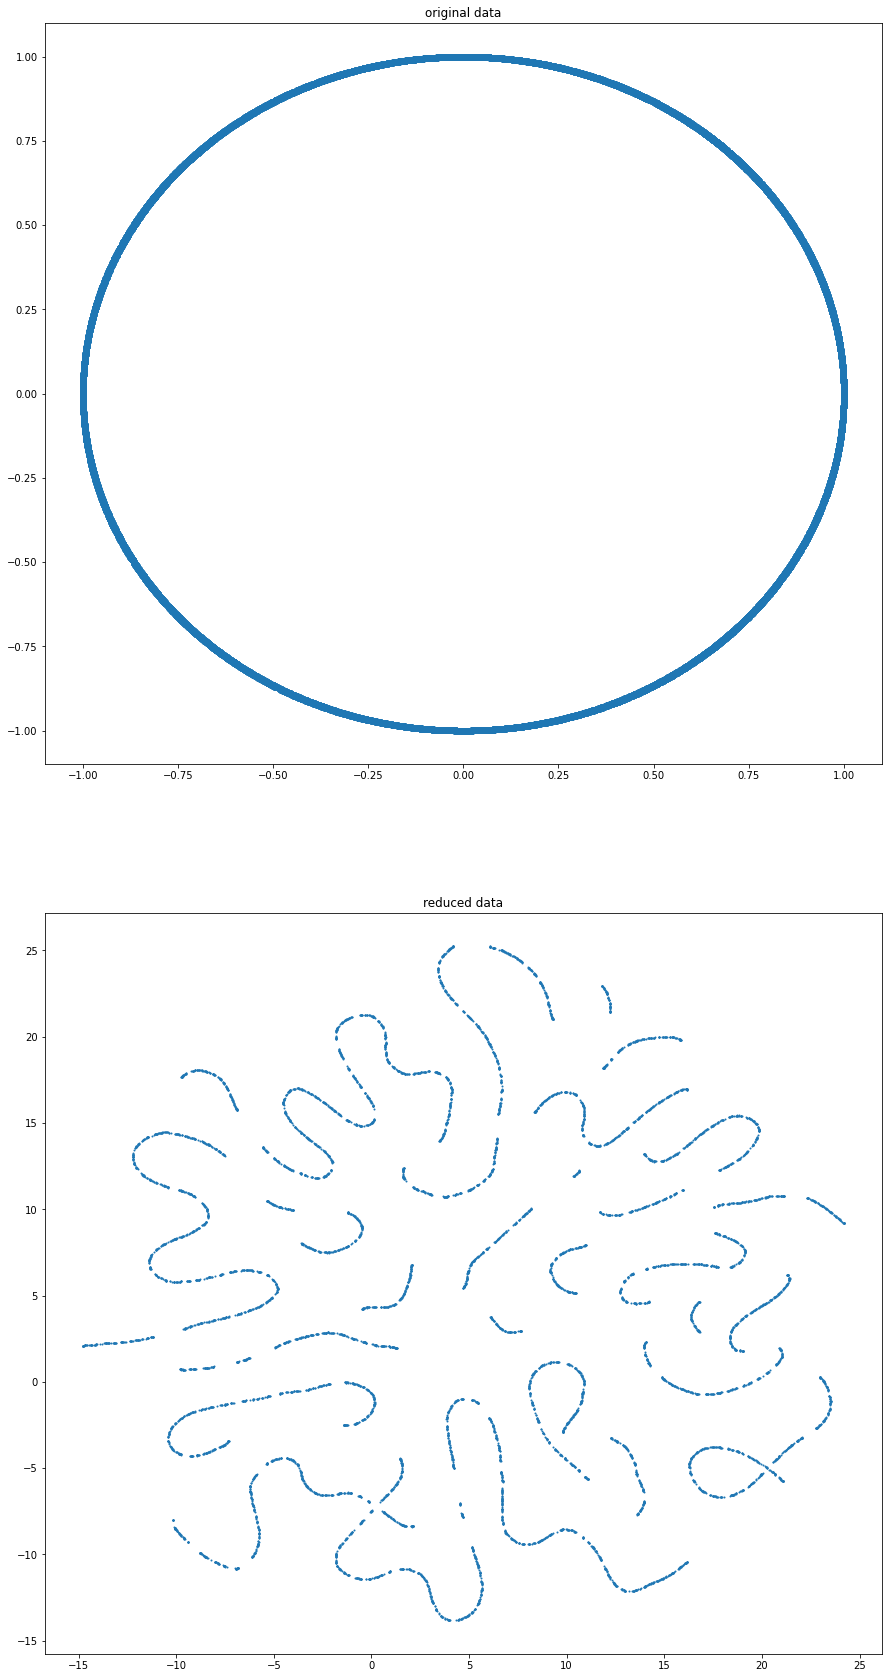

In [ ]:
umap_compare(rand_pt(2, 10000), indim=2, outdim=2)

In [ ]:
class prod_class:
  def __init__(self, d):
    m1 = special_ortho_group.rvs(d)
    m2 = special_ortho_group.rvs(d)
    matdict = {}
    matdict[-2] = np.linalg.inv(m1)
    matdict[-1] = np.linalg.inv(m2)
    matdict[1] = m2
    matdict[2] = m1
    self.md = matdict
    self.d = d

  @jit
  def __call__(self, n):
    indlist = np.random.choice(list(self.md.keys()), size=n)
    matlist = [self.md[i] for i in indlist]
    mp = np.identity(self.d)
    for i in matlist:
      mp = mp @ i
    return mp

In [ ]:
def rand_point_prod(rp, n, num=1):
  begpt = np.identity(3)[:, 0]
  if num ==1:
    rm = rp(n)
    return rm @ begpt
  return np.vstack([rp(n)@begpt for _ in range(num)])

In [ ]:
randp=rand_point_prod(prod_class(3), 100, 10000)

<ipython-input-9-6aa1b431c863>:13: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "__call__" failed type inference due to: non-precise type pyobject
During: typing of argument at <ipython-input-9-6aa1b431c863> (15)

File "<ipython-input-9-6aa1b431c863>", line 15:
  def __call__(self, n):
    indlist = np.random.choice(list(self.md.keys()), size=n)
    ^

  @jit
<ipython-input-9-6aa1b431c863>:13: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "__call__" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-9-6aa1b431c863>", line 18:
  def __call__(self, n):
      <source elided>
    mp = np.identity(self.d)
    for i in matlist:
    ^

  @jit
/usr/local/lib/python3.8/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "__call__" was compiled in object mode without forceobj=True, but has

In [ ]:
randp

array([[ 0.39054344, -0.75997268, -0.51953571],
       [ 0.38741559, -0.10511284,  0.91589325],
       [ 0.15786002,  0.53656844,  0.82895991],
       ...,
       [ 0.33005105, -0.93338152,  0.14094413],
       [ 0.60590128, -0.613053  , -0.50700065],
       [-0.03352492,  0.88231506,  0.46946374]])

In [ ]:
np.linalg.norm([ 0.33005105, -0.93338152,  0.14094413])

1.0000000026325349

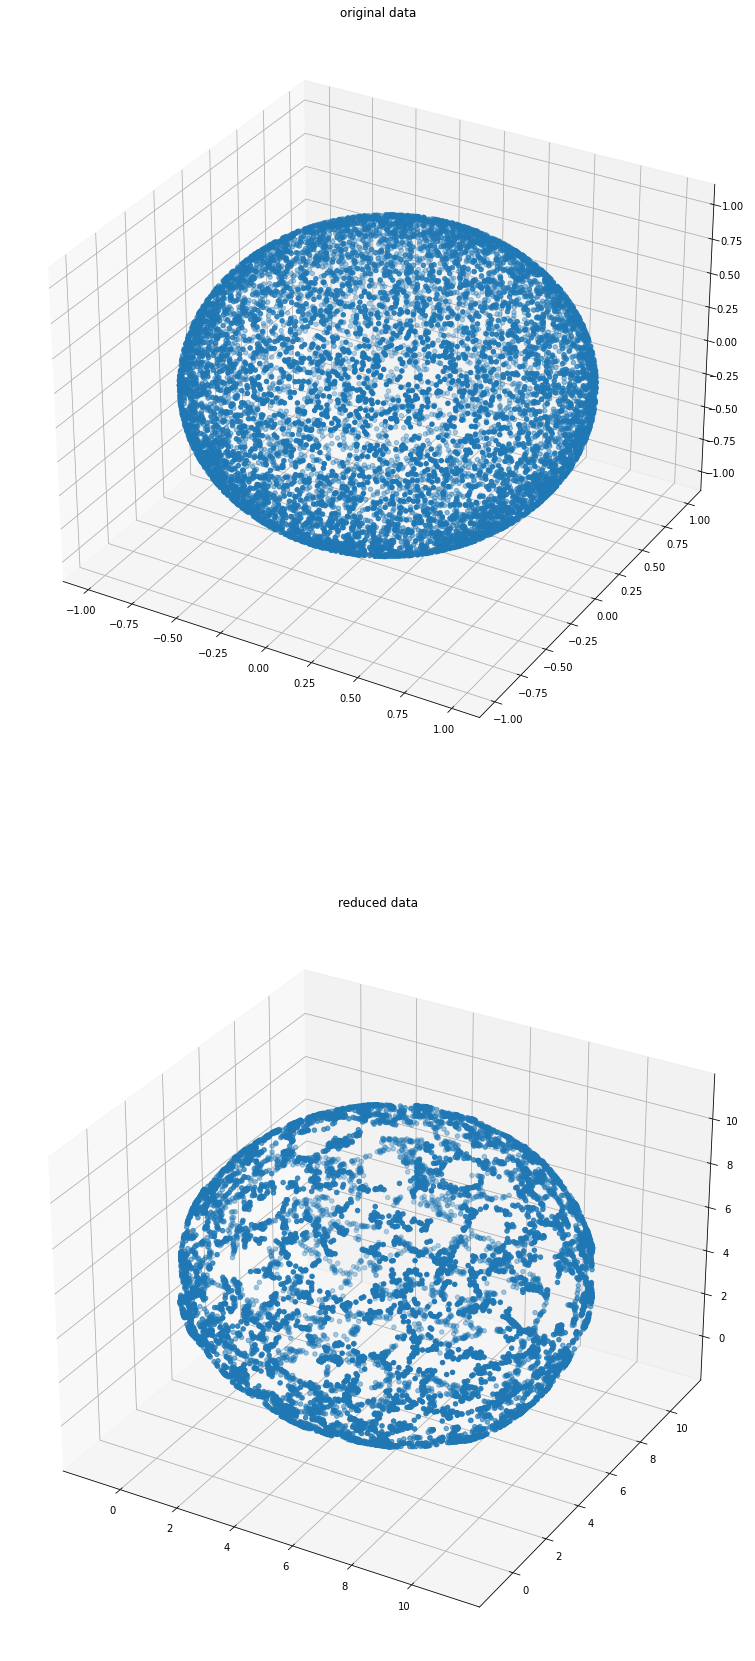

In [ ]:
umap_compare(randp, indim=3, outdim=3)

In [ ]:
randp2=rand_point_prod(prod_class(3), 20, 10000)

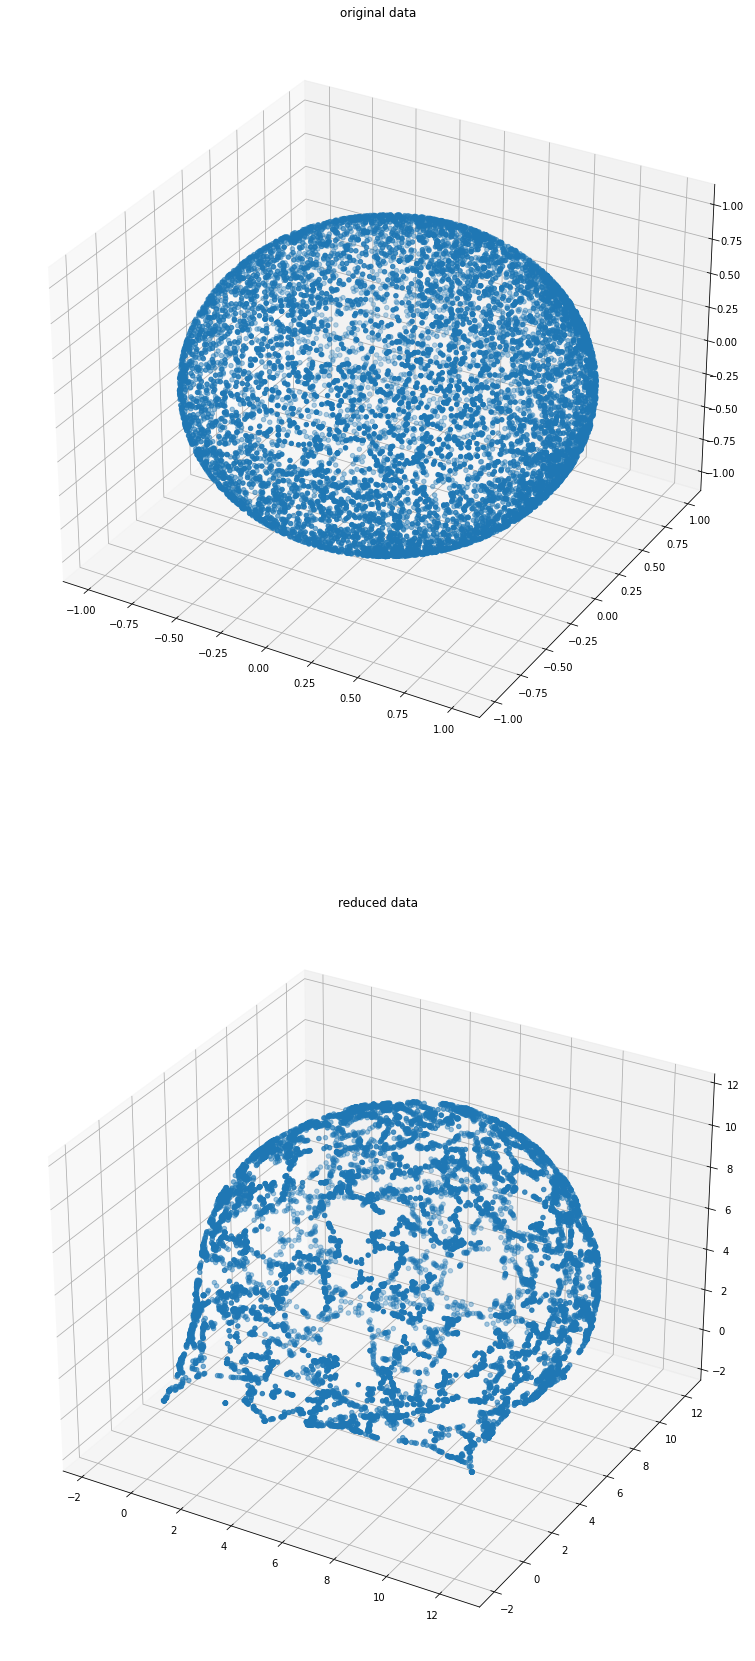

In [ ]:
umap_compare(randp2, indim=3, outdim=3)

In [ ]:
def rtorus(a, c, n):
  u = 2 * np.pi * np.random.rand(n)
  v = 2 * np.pi * np.random.rand(n)
  x = (c + a * np.cos(v)) * np.cos(u)
  y = (c + a * np.cos(v)) * np.sin(u)
  z = a * np.sin(v)
  return np.vstack([x, y, z]).T

In [ ]:
rt1 = rtorus(2, 5, 10000)

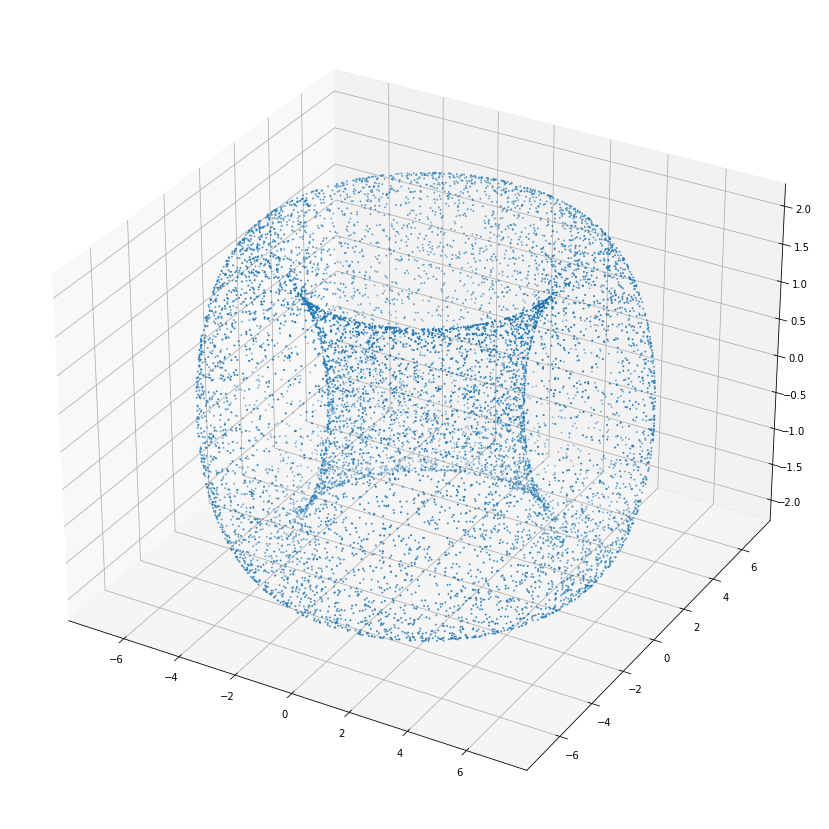

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
ax = f.add_subplot(projection='3d')
#ax = f.add_subplot()
xs = rt1[:, 0]
ys = rt1[:, 1]
zs = rt1[:, 2]
ax.scatter(xs, ys, zs, s=1)
plt.show()

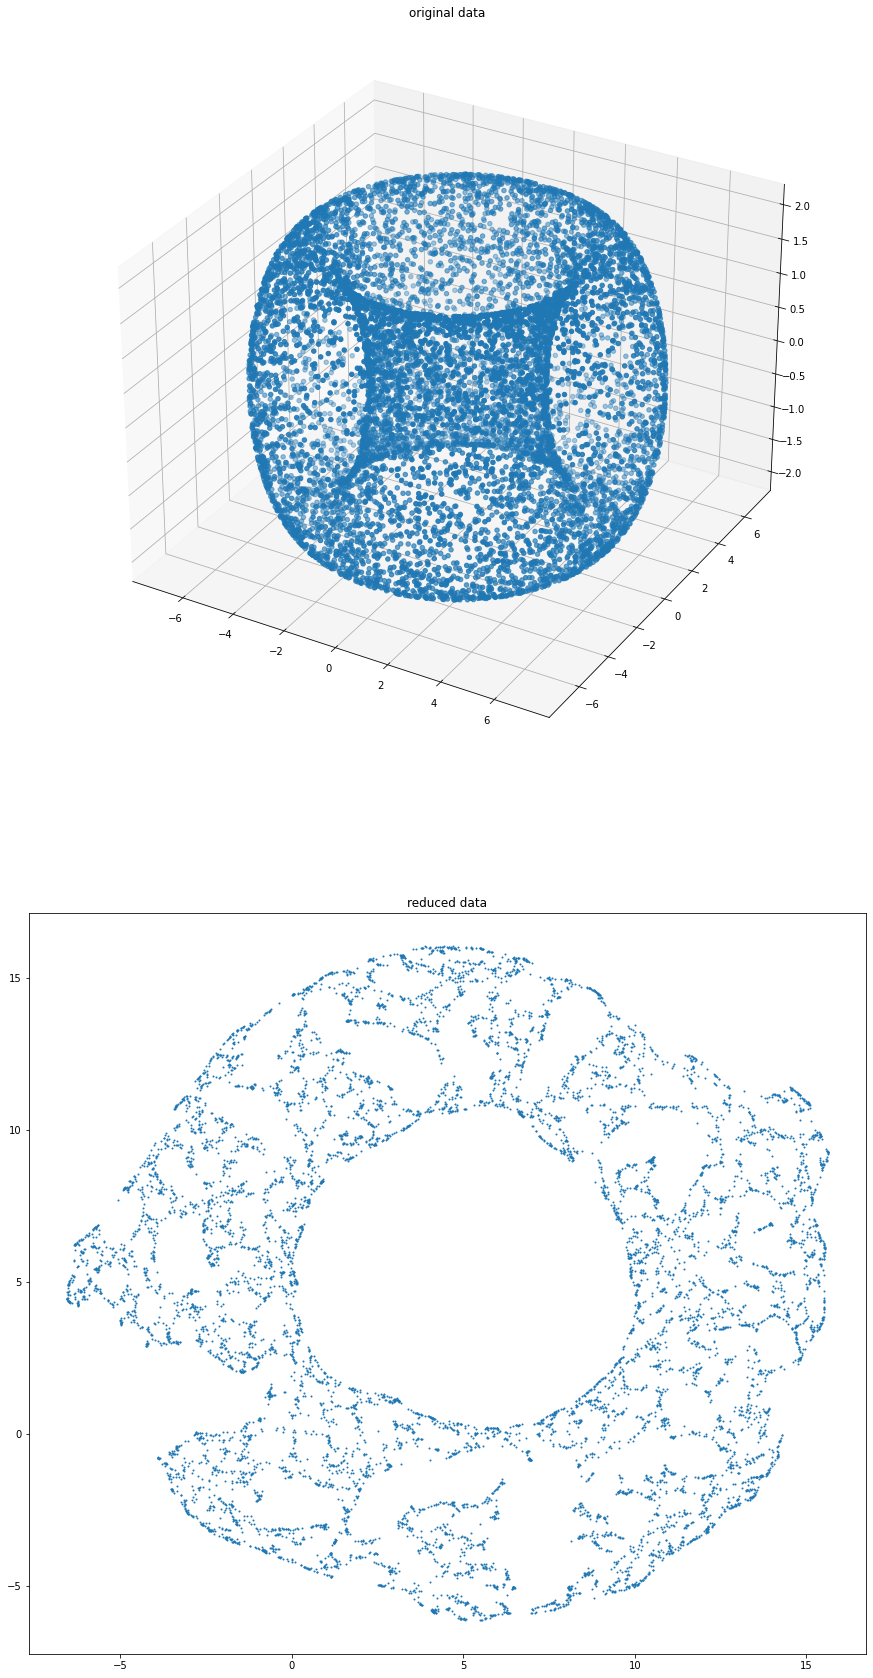

In [ ]:
umap_compare(rt1, indim=3, outdim=2)

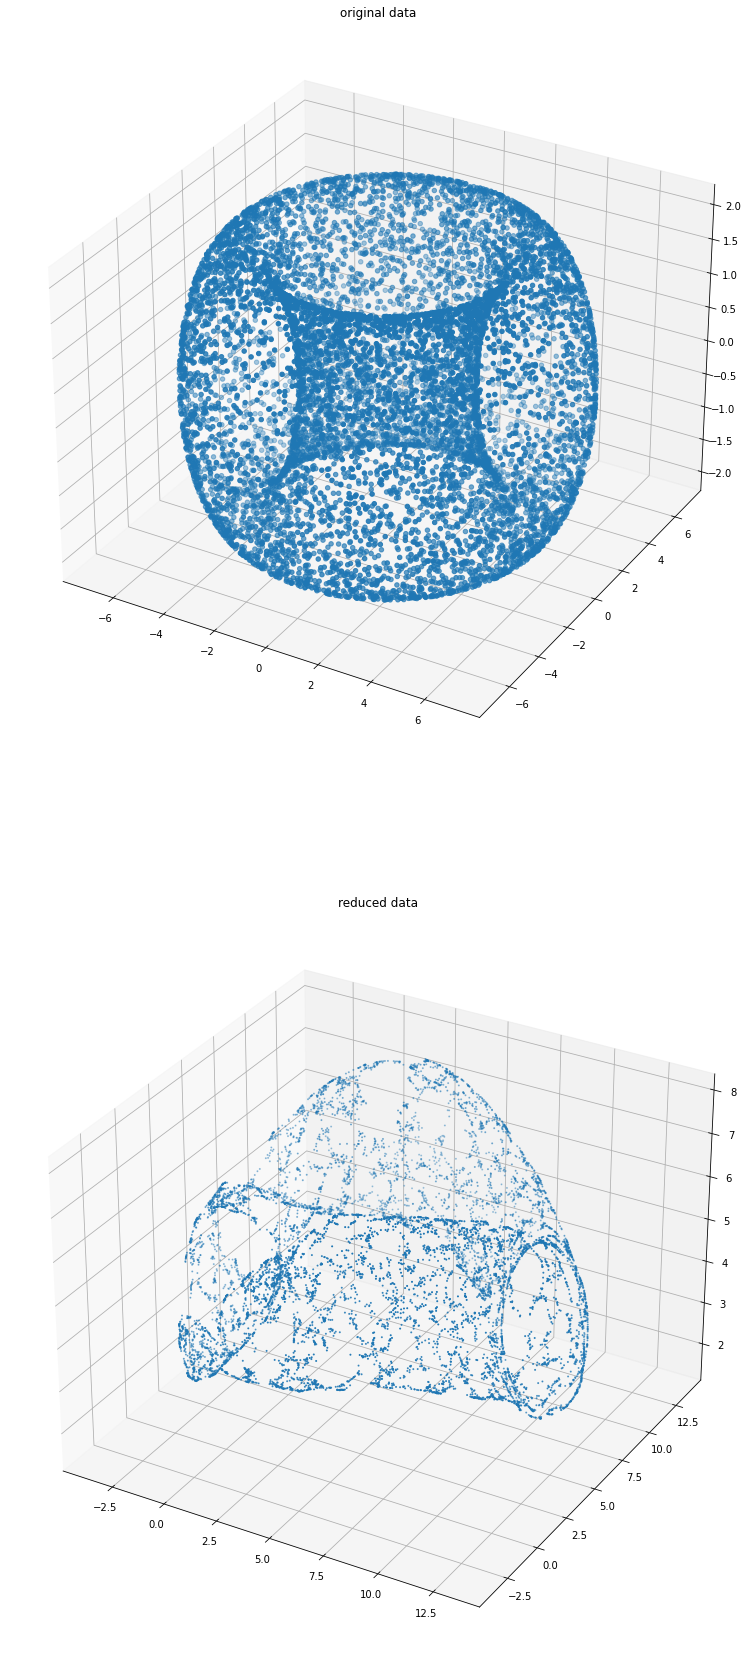

In [ ]:
umap_compare(rt1, indim=3, outdim=3)

In [ ]:
rt2 = rtorus(2, 5, 100000)

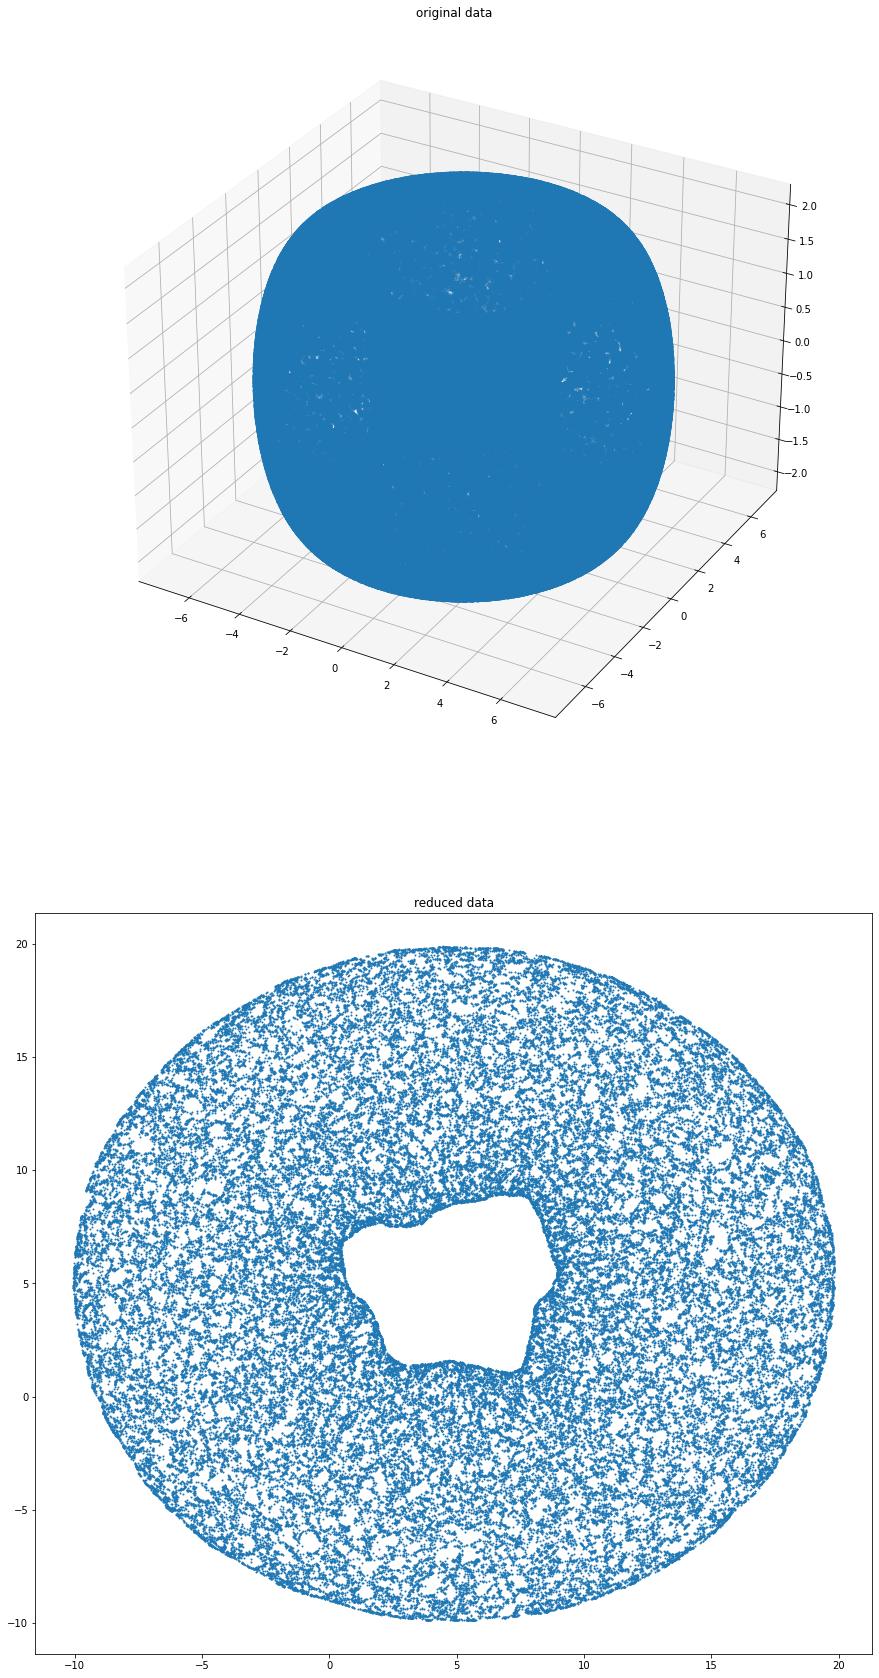

In [ ]:
umap_compare(rt2, indim=3, outdim=2)

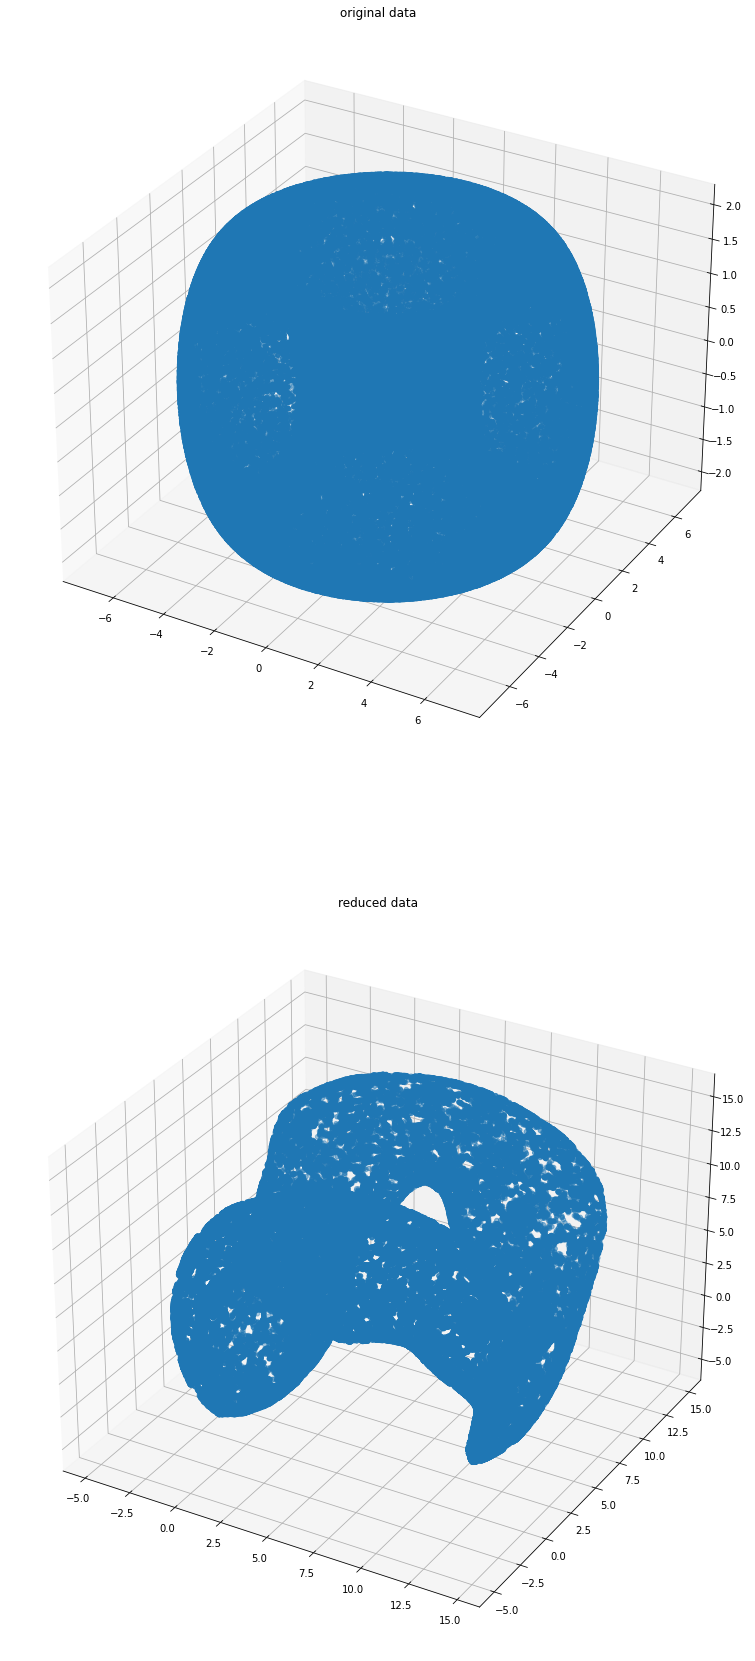

In [ ]:
umap_compare(rt2, indim=3, outdim=3)